# Running XGBoost on Preprocessed Data Set
Load the data, perform a grid search, analyze results

In [153]:
#Project Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
#Load preprocessed the data
df = pd.read_csv("traffic_data_preprocessed.csv")
df.head()

,day_of_week,time,time_of_day,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,day,month,year
0,5,9.0,2,7,-0.404153,1.055720,-0.670405,1.297362,-1.552441,-1.552441,0.612030,-0.008384,-0.032546,-0.269063,1,24,1.157384,1,9,0
1,5,10.0,2,7,0.276572,-0.249763,-0.183967,1.307378,-1.552441,-1.552441,0.692536,-0.008384,-0.032546,0.631348,1,2,0.640677,1,9,0
2,5,11.0,2,7,-0.499693,-0.309103,-0.183967,1.297362,-1.163334,-1.163334,0.708936,-0.008384,-0.032546,1.017238,1,19,0.766716,1,9,0
3,5,12.0,0,7,-1.610349,-0.309103,-0.183967,1.297362,0.003989,0.003989,0.749934,-0.008384,-0.032546,1.017238,1,19,0.896771,1,9,0
4,5,13.0,0,7,1.506654,-0.368443,-0.183967,1.297362,0.782204,0.782204,0.825223,-0.008384,-0.032546,0.631348,1,2,0.842539,1,9,0


In [155]:
from sklearn.model_selection import train_test_split

#Creating a training and a testing split
X = df.drop(columns=["traffic_volume"]).values
y = df["traffic_volume"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [156]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

#preforming a grid search on various hyperparameters 
parameters = { "booster"        : ["gbtree"],
               "learning_rate"  : [0.3, 0.4, 0.5, 0.6],        #learning rate eta
               "gamma"          : [0, 10, 20 , 30, 40],        #minimum loss reduction
               "max_depth"      : [5, 6, 7, 8],                #depth of tree    
               "reg_lambda"     : [0, 1, 5, 10, 50, 100],      #L2 regularization on weights
               "reg_alpha"      : [0, 1, 5, 10, 50, 100],      #L1 regularizaton on weights
             }

#run the grid search to find the best parameters
xgb = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
grid = GridSearchCV(estimator=xgb, param_grid=parameters, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    feature_weights=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=No...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree'], 'gamma': [0, 10, 20, 30, 40],
                         'learning_rate': [0.3, 0.4, 0.5, 0.6],
                         'max_depth': [5, 6, 7, 8],
                         'reg_alpha': [0, 1, 5, 10, 50, 100],
                         'reg_lambda': [0, 1, 5, 10, 50, 100]},
             verbose=1)

In [157]:
#finding the parameters that generated the best XGBTree
best_parameters = grid.best_params_
print(best_parameters)

{'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 8, 'reg_alpha': 1, 'reg_lambda': 10}


In [158]:
#from grid search best parameters were {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 8, 'reg_alpha': 1, 'reg_lambda': 10}

xgb = XGBRegressor( booster = 'gbtree',
                    objective='reg:squarederror',
                    eval_metric='rmse',
                    gamma = 0,
                    learning_rate = 0.3,
                    max_depth = 8, 
                    reg_alpha = 1, 
                    reg_lambda = 10,
                    random_state = 42
                    )

xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-rmse:0.72928	validation_1-rmse:0.73295
[1]	validation_0-rmse:0.54778	validation_1-rmse:0.55035
[2]	validation_0-rmse:0.42726	validation_1-rmse:0.42857
[3]	validation_0-rmse:0.34960	validation_1-rmse:0.35079
[4]	validation_0-rmse:0.29882	validation_1-rmse:0.30092
[5]	validation_0-rmse:0.26875	validation_1-rmse:0.27203
[6]	validation_0-rmse:0.24931	validation_1-rmse:0.25332
[7]	validation_0-rmse:0.23386	validation_1-rmse:0.24035
[8]	validation_0-rmse:0.22253	validation_1-rmse:0.23035
[9]	validation_0-rmse:0.21271	validation_1-rmse:0.22123
[10]	validation_0-rmse:0.20618	validation_1-rmse:0.21634
[11]	validation_0-rmse:0.20065	validation_1-rmse:0.21224
[12]	validation_0-rmse:0.19546	validation_1-rmse:0.20899
[13]	validation_0-rmse:0.18990	validation_1-rmse:0.20547
[14]	validation_0-rmse:0.18792	validation_1-rmse:0.20399
[15]	validation_0-rmse:0.18212	validation_1-rmse:0.19961
[16]	validation_0-rmse:0.17850	validation_1-rmse:0.19627
[17]	validation_0-rmse:0.17367	validation

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

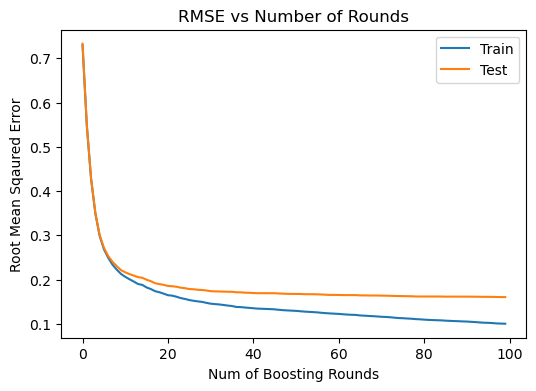

In [159]:
#seeing how well our model trained
results = xgb.evals_result()
epochs = len(results['validation_0']['rmse'])
plt.figure(figsize=(6, 4))
plt.plot(range(epochs), results['validation_0']['rmse'], label = 'Train')
plt.plot(range(epochs), results['validation_1']['rmse'], label = 'Test')
plt.xlabel('Num of Boosting Rounds')
plt.ylabel('Root Mean Sqaured Error')
plt.title("RMSE vs Number of Rounds")
plt.legend()
plt.show()


In [160]:
#prediciting on training set and testing set
y_pred_training = np.array(xgb.predict(X_train))
y_pred_testing = np.array(xgb.predict(X_test))

#calculate the rmse of our model
y_train = np.array(y_train)
y_test = np.array(y_test) 

#function to calcuate rmse
def calculate_rmse(predictions : np.ndarray, ground_truth : np.ndarray) -> np.float64:
    n = predictions.shape[0]
    rmse = np.sqrt(np.sum(((predictions - ground_truth)**2)/n))
    return rmse

rmse_for_training_set = calculate_rmse(y_pred_training, y_train)
rmse_for_testing_set = calculate_rmse(y_pred_testing , y_test)

print(rmse_for_training_set)
print(rmse_for_testing_set)


0.10016259517684023
0.16028869948595006


<Figure size 1000x800 with 0 Axes>

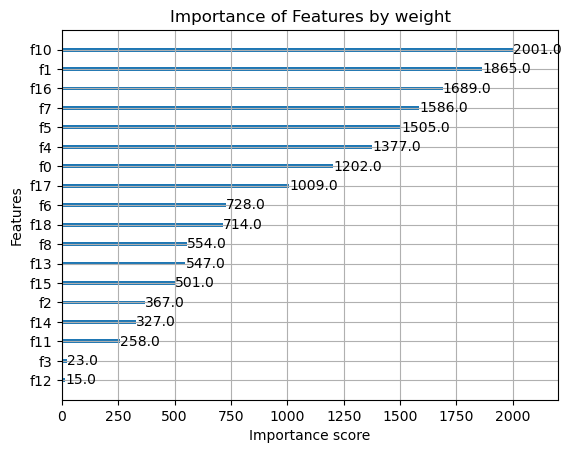

<Figure size 1000x800 with 0 Axes>

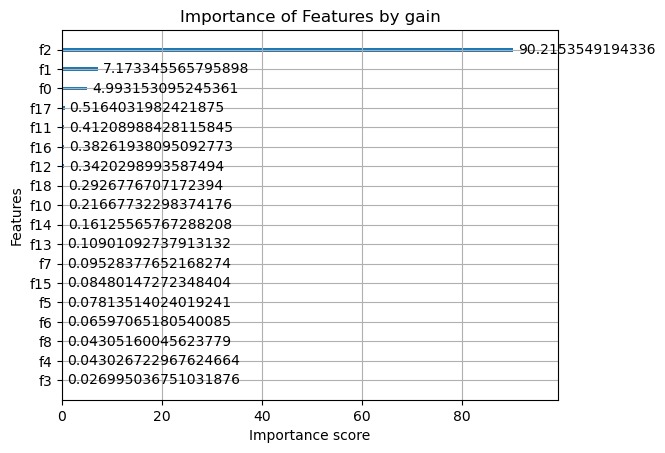

In [161]:
from xgboost import plot_importance

#importance of each feature (weight)
def plot_feature_importance(importance_type):
    plt.figure(figsize=(10, 8))
    plot_importance(xgb, importance_type=importance_type)
    plt.title(f'Importance of Features by {importance_type}')
    plt.show()

plot_feature_importance('weight')
plot_feature_importance('gain')

